# We will learn
* Import datasets from keras
* Use one-hot vectors for categrical labels(easy)
* Addlayers to keras model
* Load pre-trained weights
* Make predictons using a trained Keras model

In [1]:
from keras.datasets import cifar10
from keras.utils import np_utils #this is used to convert into one-hot vectors
import matplotlib.pyplot as plt
import numpy as npn
from PIL import Image

Using Theano backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print('Training image',x_train.shape)
print('Testing image',x_test.shape)

# Here (50000,32,32,3) means 50000datasets, 32*32 pixel image , 3 is RGB
# No need to transpose here

Training image (50000, 32, 32, 3)
Testing image (10000, 32, 32, 3)


In [4]:
print('Trainings image in y',y_train.shape)
#In y (50000,1) means 50000 datasets and 1 image hola

Trainings image in y (50000, 1)


## To display Image

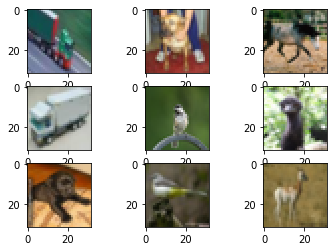

In [5]:
#Create grid 3*3 (9 total) so we do plt.subplt(330+1+i) where 330 means 3*3 hola

for i in range(0,9):
    plt.subplot(330+1+i)
    img = x_train[50+i]
    plt.imshow(img)
plt.show()

In [6]:
#Preprocessing Dataset

import numpy as np
seed = 6
np.random.seed(seed)

#load the data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [7]:
#Converting the RGB value from (0-255) to (0-1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/255.0
x_test = x_test/255.0

In [8]:
print(x_train[0])

[[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314  0.48235294 0.16470589]


In [9]:
#testing y or output
print(y_train.shape)
print(y_train[0])
print(y_train[1])

#since y is output so there are(50000 datasets , 1 output)
# and [6] means it is frog
# [9] means it is truck
# for more reference look https://www.cs.toronto.edu/~kriz/cifar.html

(50000, 1)
[6]
[9]


In [10]:
#Converting to a one-hot vector
# one-hot vector gives [6] as [0 0 0 0 0 0 1 0 0 0]
# one-hot vector gives [9] as [0 0 0 0 0 0 0 0 0 1]

#since output is y so we give y as one-hot vector
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_class = y_test.shape[1]
print(num_class)

print(y_train.shape)
print(y_train[0])

10
(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


# Model layers now
* 3 × 3 conv. 96 ReLU
* 3 × 3 conv. 96 ReLU
* 3 × 3 max-pooling stride 2
* 3 × 3 conv. 192 ReLU
* 3 × 3 conv. 192 ReLU
* 3 × 3 max-pooling stride 2
* 3 × 3 conv. 192 ReLU
* 1 × 1 conv. 192 ReLU
* 1 × 1 conv. 10 ReLU


In [23]:
import keras

In [25]:
from keras import Sequential
from keras.layers import Dropout, Activation, Conv2D, GlobalAveragePooling2D
from keras.optimizers import SGD

In [21]:
def allcnn(weights= None):
    #define model type sequential
    model = Sequential()
    
    #add model layers 
    #These are done according to above markdown values, they are done according to pattern given, not remembered
    model.add(Conv2D(96,(3,3),padding = 'same', input_shape=(32,32,3)))
    model.add(Activation('relu'))   #relu =retrilified linear unit
    model.add(Conv2D(96,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96,(3,3), padding ='same', strides=(2,2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(192,(3,3),padding = 'same'))
    model.add(Activation('relu'))   
    model.add(Conv2D(192,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(3,3), padding ='same', strides=(2,2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(192,(3,3),padding = 'same'))
    model.add(Activation('relu')) 
    model.add(Conv2D(192,(1,1),padding = 'valid'))
    model.add(Activation('relu'))  
    model.add(Conv2D(10,(1,1),padding = 'valid'))
    model.add(Activation('relu'))   
    
    #Add global polling layer with softmax Activation
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    
    #Load weights
    if weights:
        model.load_weights(weights)
        
    return model
    
    
    

In [28]:
#define hyper parameters

learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

#Build model
model = allcnn()


#Define optimizer and compile mode
sgd = SGD(lr=learning_rate, decay = weight_decay, momentum = momentum, nesterov =True)
model.compile(loss = 'categorical_crossentropy',optimizer = sgd, metrics =['accuracy'])

print(model.summary())


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_37 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_38 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 16, 16, 192)      

### This is real training, which takes 500 hrs

In [29]:
#Define additional training parameters

epochs = 350
batch_size = 32

#fit the model
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size = batch_size, verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/350
 1920/50000 [>.............................] - ETA: 23:36 - loss: 2.3019 - accuracy: 0.1156

KeyboardInterrupt: 